In [2]:
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon

In [3]:
astropy.__version__

'5.3.4'

In [4]:
astroplan.download_IERS_A()

In [5]:
custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)

In [6]:
observer = astroplan.Observer.at_site('irtf')

In [7]:
today = Time('2024-09-19 4:45:00', scale='utc') # 18:55 HST 

In [39]:
pre_twil8deg = observer.sun_set_time(today, horizon=-8*u.degree)
print('8 deg eve twilight', pre_twil8deg.iso)
pre_twil10deg = observer.sun_set_time(today, horizon=-10*u.degree)
print('10 deg eve twilight', pre_twil10deg.iso)
pre_twil12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg eve twilight', pre_twil12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg eve twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
twi6deg  = observer.twilight_morning_civil(today)
print('12 deg morn twilight', twi12deg.iso)
print('6 deg morn twilight', twi6deg.iso)



handoff = Time('2024-09-19 4:55:00', scale='utc')
end = Time('2024-09-19 13:00:00', scale='utc')

8 deg eve twilight 2024-09-19 04:51:30.178
10 deg eve twilight 2024-09-19 05:00:01.819
12 deg eve twilight 2024-09-19 05:08:34.045
15 deg eve twilight 2024-09-19 05:21:23.681
18 deg eve twilight 2024-09-19 05:34:15.240
18 deg morn twilight 2024-09-19 14:56:59.446
15 deg morn twilight 2024-09-19 15:09:51.397
12 deg morn twilight 2024-09-19 15:22:41.530
6 deg morn twilight 2024-09-19 15:48:17.254


In [10]:
#NIR Standards: IRTF Night 2024-03-23

#for SN 2023ixf
HIP71172   = astroplan.FixedTarget(coord=SkyCoord('14:33:23.46', '+44:19:53.8', unit=(u.hourangle, u.degree)),
                                      name='HIP71172') #V~9.3 
HIP65280   = astroplan.FixedTarget(coord=SkyCoord('13:22:45.12', '+44:42:54.0', unit=(u.hourangle, u.degree)),
                                      name='HIP71172') #V~8.3
 
#for SN 2023mut 
HIP22923   = astroplan.FixedTarget(coord=SkyCoord('04:55:58.36',  '+05:23:56.6', unit=(u.hourangle, u.degree)),
                                      name='HIP22923') #V~6.5 
HIP24266   = astroplan.FixedTarget(coord=SkyCoord('05:12:29.12',  '-00:30:34.3', unit=(u.hourangle, u.degree)),
                                      name='HIP24266') #V~8.9

#for SN 2023zcu
HIP28520   = astroplan.FixedTarget(coord=SkyCoord('06:01:13.10',  '-25:25:03.9', unit=(u.hourangle, u.degree)),
                                      name='HIP28520') #V~6
HIP28960   = astroplan.FixedTarget(coord=SkyCoord('06:06:42.85',  '-22:24:10.7', unit=(u.hourangle, u.degree)),
                                      name='HIP28960') #V~8.7 
HIP29194   = astroplan.FixedTarget(coord=SkyCoord('06:09:29.28', '-24:14:58.8',  unit=(u.hourangle, u.degree)),
                                      name='HIP29194') #V~8.4

#for SN 2024bch
HIP53735   = astroplan.FixedTarget(coord=SkyCoord('10:59:40.21',  '+45:47:19.0', unit=(u.hourangle, u.degree)),
                                      name='HIP53735') #V~8.9
HIP56147   = astroplan.FixedTarget(coord=SkyCoord('11:30:29.83',  '+48:56:08.7', unit=(u.hourangle, u.degree)),
                                      name='HIP56147') #V~7.4  

#for SN 2024gy
HIP62745   = astroplan.FixedTarget(coord=SkyCoord('12:51:23.33',  '+12:22:21.9', unit=(u.hourangle, u.degree)),
                                      name='HIP62745') #V~8.9
HIP56736   = astroplan.FixedTarget(coord=SkyCoord('11:37:57.82', '+15:46:36.9',  unit=(u.hourangle, u.degree)),
                                      name='HIP56736') #V~8.8

#for SN 2023plg
HIP35345   = astroplan.FixedTarget(coord=SkyCoord('07:18:04.09',  '+30:57:21.1', unit=(u.hourangle, u.degree)),
                                      name='HIP35345') #V~6.2
HIP36078   = astroplan.FixedTarget(coord=SkyCoord('07:26:02.42',  '+14:06:10.7', unit=(u.hourangle, u.degree)),
                                      name='HIP36078') #V~7.4
HIP29909   = astroplan.FixedTarget(coord=SkyCoord('06:17:50.87',  '+19:27:25.9',  unit=(u.hourangle, u.degree)),
                                      name='HIP29909') #V~7.5

#for SN 2023ufx
HIP38722   = astroplan.FixedTarget(coord=SkyCoord('07:55:39.89',  '+19:53:02.2', unit=(u.hourangle, u.degree)),
                                      name='HIP38722') #V~5.4
HIP43018   = astroplan.FixedTarget(coord=SkyCoord('08:45:59.29', '+13:15:49.6', unit=(u.hourangle, u.degree)),
                                      name='HIP43018') #V~8.7
HIP36078   = astroplan.FixedTarget(coord=SkyCoord('07:26:02.42',  '+14:06:10.7', unit=(u.hourangle, u.degree)),
                                      name='HIP36078') #V~7.4

#for SN 2024cld
HIP80974   = astroplan.FixedTarget(coord=SkyCoord('16:32:08.10', '-12:25:53.8', unit=(u.hourangle, u.degree)),
                                      name='HIP80974') #V~7
HIP73939   = astroplan.FixedTarget(coord=SkyCoord('15:06:34.23',  '-12:54:25.2', unit=(u.hourangle, u.degree)),
                                      name='HIP73939') #V~7.5
HIP73087   = astroplan.FixedTarget(coord=SkyCoord('14:56:13.23',  '+14:26:46.6', unit=(u.hourangle, u.degree)),
                                      name='HIP73087') #V~5.9

#for SN 2023fyq
HIP62745   = astroplan.FixedTarget(coord=SkyCoord('12:51:23.33',  '+12:22:21.9',  unit=(u.hourangle, u.degree)),
                                      name='HIP62745') #V~8.9
HIP61138   = astroplan.FixedTarget(coord=SkyCoord('12:31:41.30', '+22:07:24.4',  unit=(u.hourangle, u.degree)),
                                      name='HIP61138') #V~8.8

#for SN 2024inv 
HIP56736   = astroplan.FixedTarget(coord=SkyCoord('11:37:57.81', '+15 46 36.85',  unit=(u.hourangle, u.degree)),
                                      name='HIP56736') #V~8.8 

#for SN 2024kce
HIP61960   = astroplan.FixedTarget(coord=SkyCoord('12 41 53.06', '+10 14 08.25',  unit=(u.hourangle, u.degree)),
                                      name='HIP61960') #V~4.9 


#for SN 2024ahv
HIP79332   = astroplan.FixedTarget(coord=SkyCoord('16 11 28.74', '+16 39 56.49',  unit=(u.hourangle, u.degree)),
                                      name='HIP79332') #V~6.1 

#for SN 2024gqd
HIP87108   = astroplan.FixedTarget(coord=SkyCoord('17 47 53.56', '+02 42 26.2',  unit=(u.hourangle, u.degree)),
                                      name='HIP96753') #V~3.8

#for SN 2024pxl
HIP88429   = astroplan.FixedTarget(coord=SkyCoord('18:03:14.57',  '+19:36:47.4',  unit=(u.hourangle, u.degree)),
                                      name='HIP88429') #V~6.4

#for SN 2024seh
HIP105782 = astroplan.FixedTarget(coord=SkyCoord('21:25:24.91 -14:16:38.43',  unit=(u.hourangle, u.degree)),
                                      name='HIP105782') #V~6.9

#for SN 2024rbc
HIP1603 = astroplan.FixedTarget(coord=SkyCoord('00:20:05.17 +48:51:55.62',  unit=(u.hourangle, u.degree)),
                                      name='HIP1603') #V~6.5

#for SN 2024pxk
HIP10512 = astroplan.FixedTarget(coord=SkyCoord('02:15:28.31 -09:27:59.50',  unit=(u.hourangle, u.degree)),
                                      name='HIP10512') #V~6.5

In [11]:
stds_nir = [HIP71172, HIP65280, HIP22923, HIP24266, HIP28960, HIP29194, HIP53735, HIP56147, HIP62745, HIP56736, HIP36078, HIP29909, HIP43018, HIP36078, HIP80974, HIP73939, HIP61138, HIP73087, HIP56736, HIP61960, HIP79332]

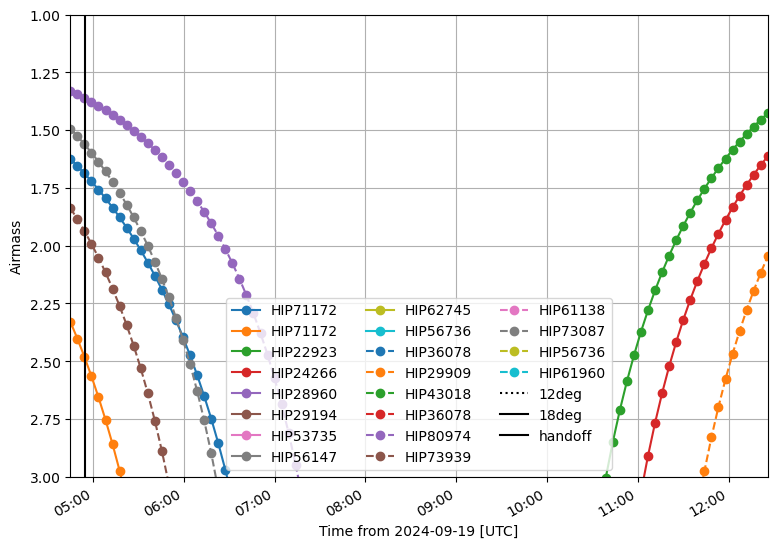

In [12]:
from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(0, 0.32, 100)
plt.figure(figsize=(9,6))
for istd_nir, istyle in zip(stds_nir, custom_cycler):
    plots.plot_airmass(istd_nir, observer, time, style_kwargs=istyle)
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [25]:
sn2019uo    = astroplan.FixedTarget(coord=SkyCoord('12:02:36.56', '+41:03:42.3', unit=(u.hourangle, u.degree)),
                                  name='2019uo')
sn2017ivh    = astroplan.FixedTarget(coord=SkyCoord('13:39:36.25', '-11:28:55.9', unit=(u.hourangle, u.degree)),
                                  name='2017ivh')
sn2017eaw    = astroplan.FixedTarget(coord=SkyCoord('20:34:44.24', '+60:11:35.9', unit=(u.hourangle, u.degree)),
                                  name='2017eaw')
sn2017ivv    = astroplan.FixedTarget(coord=SkyCoord('20:28:49.84', '-04:22:57.3', unit=(u.hourangle, u.degree)),
                                  name='2017ivv')
sn2018gj    = astroplan.FixedTarget(coord=SkyCoord('16:32:02.40', '+78:12:41.1', unit=(u.hourangle, u.degree)),
                                  name='2018gj')
sn2018aoq    = astroplan.FixedTarget(coord=SkyCoord('12:10:38.19', '+39:23:47.0', unit=(u.hourangle, u.degree)),
                                  name='2018aoq')
sn2018las    = astroplan.FixedTarget(coord=SkyCoord('10:59:52.23', '+19:47:41.8', unit=(u.hourangle, u.degree)),
                                  name='2018las')
sn2018aoz  = astroplan.FixedTarget(coord=SkyCoord('11:51:01.79', '-28:44:38.4', unit=(u.hourangle, u.degree)),
                                   name='2018aoz')
sn2018bsz = astroplan.FixedTarget(coord=SkyCoord('16:09:39.20', '-32:03:45.2', unit=(u.hourangle, u.degree)),
                                   name='2018bsz')
sn2018hmx = astroplan.FixedTarget(coord=SkyCoord('08:33:39.34', '+55:35:53.0', unit=(u.hourangle, u.degree)),
                                   name='2018hmx')
sn2018hna = astroplan.FixedTarget(coord=SkyCoord('12:26:12.05', '+58:18:51.1', unit=(u.hourangle, u.degree)),
                                   name='2018hna')
sn2018bwr = astroplan.FixedTarget(coord=SkyCoord('15:28:26.17', '+08:48:22.2', unit=(u.hourangle, u.degree)),
                                   name='2018bwr')
sn2017cjb = astroplan.FixedTarget(coord=SkyCoord('12:53:50.45', '+09:42:17.7', unit=(u.hourangle, u.degree)),
                                   name='2017cjb')
sn2017gmr = astroplan.FixedTarget(coord=SkyCoord('02:35:30.15', '-09:21:15.0', unit=(u.hourangle, u.degree)),
                                   name='2017gmr')
sn2018hhn = astroplan.FixedTarget(coord=SkyCoord('22:52:32.06', '+11:40:26.7', unit=(u.hourangle, u.degree)),
                                   name='2018hhn')
sn2018giu = astroplan.FixedTarget(coord=SkyCoord('20:27:49.22', '+09:54:51.9', unit=(u.hourangle, u.degree)),
                                   name='2018giu')
sn2018eog = astroplan.FixedTarget(coord=SkyCoord('20:28:12.03', '-03:08:11.2', unit=(u.hourangle, u.degree)),
                                   name='2018eog')
sn2019cxu = astroplan.FixedTarget(coord=SkyCoord('13:05:30.09', '-08:45:52.7', unit=(u.hourangle, u.degree)),
                                   name='2019cxu')
sn2020jfv = astroplan.FixedTarget(coord=SkyCoord('23:06:35.75', '+00:36:43.6', unit=(u.hourangle, u.degree)),
                                   name='2020jfv')
sn2021aatd = astroplan.FixedTarget(coord=SkyCoord('00:59:04.17', '-00:12:12.2', unit=(u.hourangle, u.degree)),
                                   name='2021aatd')

sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2022crv = astroplan.FixedTarget(coord=SkyCoord('09:54:25.82', '-25:42:10.5', unit=(u.hourangle, u.degree)),
                                   name='2022crv')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2022ewj = astroplan.FixedTarget(coord=SkyCoord('10:46:34.61', '+13:45:16.9', unit=(u.hourangle, u.degree)),
                                   name='2022ewj')
sn2022mma = astroplan.FixedTarget(coord=SkyCoord('14:39:01.50', '+15:59:11.8', unit=(u.hourangle, u.degree)),
                                   name='2022mma')
sn2022abq = astroplan.FixedTarget(coord=SkyCoord('13:22:56.79', '+28:19:09.6', unit=(u.hourangle, u.degree)),
                                   name='2022abq')
sn2022frq = astroplan.FixedTarget(coord=SkyCoord('13:27:56.91', '-13:24:59.2', unit=(u.hourangle, u.degree)),
                                   name='2022frq')
sn2022kad = astroplan.FixedTarget(coord=SkyCoord('14:58:43.32', '+11:37:50.9', unit=(u.hourangle, u.degree)),
                                   name='2022kad')
sn2022fuc = astroplan.FixedTarget(coord=SkyCoord('12:34:34.25', '+63:31:06.4', unit=(u.hourangle, u.degree)),
                                   name='2022fuc')
sn2023bee = astroplan.FixedTarget(coord=SkyCoord('08:56:11.63', '-03:19:32.0', unit=(u.hourangle, u.degree)),
                                   name='2023bee')
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu')    

sn2021ahpl =  astroplan.FixedTarget(coord=SkyCoord('15:15:57.94', '-19:17:32.0', unit=(u.hourangle, u.degree)),
                                   name='2021ahpl') 
sn2021yja = astroplan.FixedTarget(coord=SkyCoord('03:24:21.17', '-21:33:56.2', unit=(u.hourangle, u.degree)),
                                   name='2021yja')

sn2022wsp = astroplan.FixedTarget(coord=SkyCoord('23:00:03.56', '+15:58:43.9', unit=(u.hourangle, u.degree)),
                                   name='2022wsp') 
sn2022xkq = astroplan.FixedTarget(coord=SkyCoord('05:05:23.71', '-11:52:56.1', unit=(u.hourangle, u.degree)),
                                   name='2022xkq') 
sn2022aaiq = astroplan.FixedTarget(coord=SkyCoord('14:26:32.03', '+56:35:03.2', unit=(u.hourangle, u.degree)),
                                   name='2022aaiq') 
sn2023cpt = astroplan.FixedTarget(coord=SkyCoord('15:21:33.36', '-13:05:21.7', unit=(u.hourangle, u.degree)),
                                   name='2023cpt') 
sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa') 
sn2022pul = astroplan.FixedTarget(coord=SkyCoord('12:26:48.86', '+08:26:55.3', unit=(u.hourangle, u.degree)),
                                   name='2022pul') 
sn2022qzr = astroplan.FixedTarget(coord=SkyCoord('00:09:55.01', '-05:01:16.1', unit=(u.hourangle, u.degree)),
                                   name='2022qzr') 
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu') 
sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32', '-03:47:53.6', unit=(u.hourangle, u.degree)),
                                   name='2023gft') 
sn2023ktw = astroplan.FixedTarget(coord=SkyCoord('17:27:29.91', '+34:17:53.03', unit=(u.hourangle, u.degree)),
                                   name='2023ktw') 
sn2021qqu = astroplan.FixedTarget(coord=SkyCoord('03:37:51.90', '-14:58:33.8', unit=(u.hourangle, u.degree)),
                                   name='2021qqu')
sn2023ehl = astroplan.FixedTarget(coord=SkyCoord('20:25:10.75', '+05:15:24.3', unit=(u.hourangle, u.degree)),
                                   name='2023ehl')

sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32', '-03:47:53.6',  unit=(u.hourangle, u.degree)),
                                   name='2023gft')
sn2023dbc = astroplan.FixedTarget(coord=SkyCoord('11:11:39.21', '+55:40:29.2', unit=(u.hourangle, u.degree)),
                                   name='2023dbc')
sn2023dtc = astroplan.FixedTarget(coord=SkyCoord('08:33:17.54', '-22:57:45.0', unit=(u.hourangle, u.degree)),
                                   name='2023dtc')

sn2023esp = astroplan.FixedTarget(coord=SkyCoord('06:46:53.85', '+15:35:54.2', unit=(u.hourangle, u.degree)),
                                   name='2023esp')
sn2022aagp = astroplan.FixedTarget(coord=SkyCoord('09:10:41.91' '+07:12:20.4', unit=(u.hourangle, u.degree)),
                                   name='2022aagp')
sn2022erq = astroplan.FixedTarget(coord=SkyCoord('18:33:25.36', '+44:05:11.6', unit=(u.hourangle, u.degree)),
                                   name='2022erq')
sn2023qea = astroplan.FixedTarget(coord=SkyCoord('18:09:04.97', '+42:34:21.7', unit=(u.hourangle, u.degree)),
                                   name='2022qea')
sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa')
at2023ufx = astroplan.FixedTarget(coord=SkyCoord('08:24:51.57', '+21:17:43.3', unit=(u.hourangle, u.degree)),
                                   name='2023ufx')
sn2023mut = astroplan.FixedTarget(coord=SkyCoord('04:48:34.34', '+00:14:47.5', unit=(u.hourangle, u.degree)),
                                   name='2023mut')
sn2023rau = astroplan.FixedTarget(coord=SkyCoord('00:20:55.24', '-01:45:28.5', unit=(u.hourangle, u.degree)),
                                   name='2023rau')
sn2023ufx = astroplan.FixedTarget(coord=SkyCoord('08:24:51.57', '+21:17:43.3', unit=(u.hourangle, u.degree)),
                                   name='2023ufx')
sn2023qov = astroplan.FixedTarget(coord=SkyCoord('21:12:02.04', '-49:15:18.1', unit=(u.hourangle, u.degree)),
                                   name='2023qov')
sn2023ubp = astroplan.FixedTarget(coord=SkyCoord('23:10:31.07', '+02:57:15.6', unit=(u.hourangle, u.degree)),
                                   name='2023ubp')
sn2023tsz = astroplan.FixedTarget(coord=SkyCoord('08:37:29.53', '-00:02:35.7', unit=(u.hourangle, u.degree)),
                                   name='2023tsz')
sn2023nlk = astroplan.FixedTarget(coord=SkyCoord('17:20:53.29', '+22:12:35.3', unit=(u.hourangle, u.degree)),
                                   name='2023nlk')
sn2022acko = astroplan.FixedTarget(coord=SkyCoord('03:19:38.98', '-19:23:42.5', unit=(u.hourangle, u.degree)),
                                   name='2022acko')
sn2023ngy = astroplan.FixedTarget(coord=SkyCoord('22:18:30.18', '+29:14:41.1', unit=(u.hourangle, u.degree)),
                                   name='2023ngy')
sn2023wed = astroplan.FixedTarget(coord=SkyCoord('07:24:15.50', '+19:04:52.7', unit=(u.hourangle, u.degree)),
                                   name='2023wed')
sn2022ablq = astroplan.FixedTarget(coord=SkyCoord('12:13:06.48', '+17:05:56.2', unit=(u.hourangle, u.degree)),
                                   name='2022ablq')
sn2022xxf = astroplan.FixedTarget(coord=SkyCoord('11:30:05.89', '+09:16:57.3', unit=(u.hourangle, u.degree)),
                                   name='2022xxf')
sn2023plg = astroplan.FixedTarget(coord=SkyCoord('07:17:03.16', '+24:57:31.7', unit=(u.hourangle, u.degree)),
                                   name='2023plg')
sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2023xje = astroplan.FixedTarget(coord=SkyCoord('05:38:52.978', '-35:55:17.07', unit=(u.hourangle, u.degree)),
                                   name='2023xje')
sn2023ixf = astroplan.FixedTarget(coord=SkyCoord('14:03:38.56', '+54:18:42.0', unit=(u.hourangle, u.degree)),
                                   name='2023ixf')
sn2023fyq = astroplan.FixedTarget(coord=SkyCoord('12:25:45.87', '+12:39:48.7', unit=(u.hourangle, u.degree)),
                                   name='2023fyq')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2023cr = astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                   name='2023cr')
sn2023xgo= astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                   name='2023cr')
sn2023wdd= astroplan.FixedTarget(coord=SkyCoord('01:18:11.05', '+38:26:32.7', unit=(u.hourangle, u.degree)),
                                   name='2023wdd')
sn2023zcu= astroplan.FixedTarget(coord=SkyCoord('06:01:06.84', '-23:40:29.2', unit=(u.hourangle, u.degree)),
                                   name='2023zcu')
sn2021qqu_host = astroplan.FixedTarget(coord=SkyCoord('03:37:51.90', '-14:58:33.8', unit=(u.hourangle, u.degree)),
                                   name='2021qqu host')
sn2024bch = astroplan.FixedTarget(coord=SkyCoord('10:21:49.74' '+56:55:40.4', unit=(u.hourangle, u.degree)),
                                   name='2024bch')
sn2024gy = astroplan.FixedTarget(coord=SkyCoord('12:15:51.31' '+13:06:56.1', unit=(u.hourangle, u.degree)),
                                   name='2024gy')
sn2024cld = astroplan.FixedTarget(coord=SkyCoord('15:50:21.61 +18:56:21.1', unit=(u.hourangle, u.degree)),
                                   name='2024cld')
sn2024ahv = astroplan.FixedTarget(coord=SkyCoord('16:18:46.310 +07:24:44.84', unit=(u.hourangle, u.degree)),
                                   name='2024ahv')
sn2024chx = astroplan.FixedTarget(coord=SkyCoord('09:54:28.509 -18:38:10.83', unit=(u.hourangle, u.degree)),
                                   name='2024chx')
sn2024yf  = astroplan.FixedTarget(coord=SkyCoord('12:58:05.05 -40:54:24.5', unit=(u.hourangle, u.degree)),
                                   name='2024yf')
sn2024ehs = astroplan.FixedTarget(coord=SkyCoord('10:53:00.52 +17:34:21.5', unit=(u.hourangle, u.degree)),
                                   name='2024ehs')
sn2023acft = astroplan.FixedTarget(coord=SkyCoord('05:15:05.17 -34:24:04.0', unit=(u.hourangle, u.degree)),
                                   name='2023acft')
sn2024dy = astroplan.FixedTarget(coord=SkyCoord('10:46:45.030' '+29:54:33.80', unit=(u.hourangle, u.degree)),
                                   name='2024dy')
sn2024any = astroplan.FixedTarget(coord=SkyCoord('03:08:57.83 -02:56:45.9', unit=(u.hourangle, u.degree)),
                                   name='2024any')
sn2024inv = astroplan.FixedTarget(coord=SkyCoord('11:06:32.16 +11:22:42.6', unit=(u.hourangle, u.degree)),
                                   name='2024inv')
sn2024kce = astroplan.FixedTarget(coord=SkyCoord('12:29:49.55 +08:12:48.5', unit=(u.hourangle, u.degree)),
                                   name='2024kce')
sn2024gqd = astroplan.FixedTarget(coord=SkyCoord('17:04:32.42 +01:20:42.7', unit=(u.hourangle, u.degree)),
                                   name='2024gqd')
sn2024itg = astroplan.FixedTarget(coord=SkyCoord('17:04:32.42 +01:20:42.7', unit=(u.hourangle, u.degree)),
                                   name='2024itg')
sn2024ifo = astroplan.FixedTarget(coord=SkyCoord('15:29:34.87 +11:17:20.6', unit=(u.hourangle, u.degree)),
                                   name='2024ifo')
sn2024pxl = astroplan.FixedTarget(coord=SkyCoord('17:32:27.35 +07:03:44.8', unit=(u.hourangle, u.degree)),
                                   name='2024pxl')
sn2024kgi = astroplan.FixedTarget(coord=SkyCoord('22:44:43.99 +16:05:07.0', unit=(u.hourangle, u.degree)),
                                   name='2024kgi')
sn2024muv = astroplan.FixedTarget(coord=SkyCoord('12:49:02.46 -08:39:51.1', unit=(u.hourangle, u.degree)),
                                   name='2024muv')
sn2024jlf = astroplan.FixedTarget(coord=SkyCoord('14:37:42.32 +02:17:04.2', unit=(u.hourangle, u.degree)),
                                   name='2024jlf')
sn2024seh = astroplan.FixedTarget(coord=SkyCoord('21:55:50.90 -03:05:23.2', unit=(u.hourangle, u.degree)),
                                   name='2024seh')
sn2024rbc = astroplan.FixedTarget(coord=SkyCoord('00:12:21.446 +31:03:48.11', unit=(u.hourangle, u.degree)),
                                   name='2024rbc')
sn2024pxk = astroplan.FixedTarget(coord=SkyCoord('02:39:46.529 -13:01:21.59', unit=(u.hourangle, u.degree)),
                                   name='2024pxk')

In [26]:
targets = [sn2024pxl, sn2024seh, sn2024kgi, sn2024rbc, sn2024pxk]


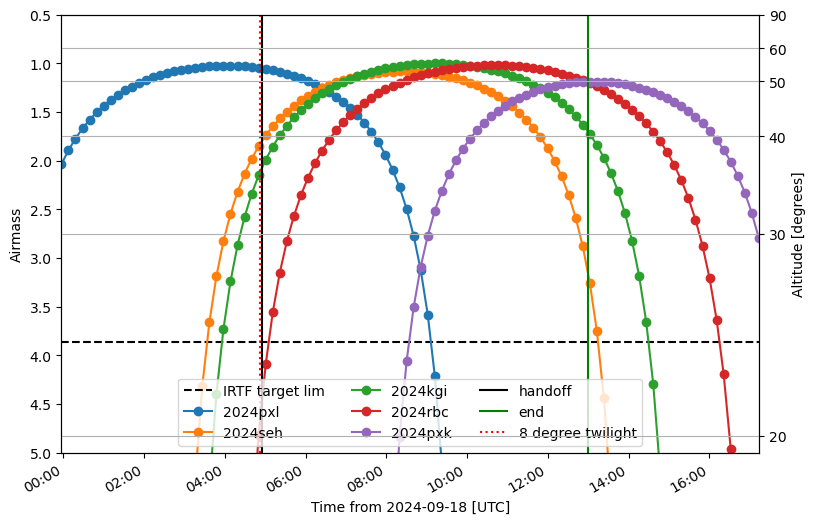

In [27]:
plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-15)*u.degree).to(u.radian)), color='k', ls='--', label='IRTF target lim')


time = today+np.linspace(-0.2, 0.52, 100)


for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)


ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(end.plot_date, label='end', color='green')
ax.axvline(pre_twil8deg.plot_date, color='red', ls=':', label="8 degree twilight")

ax.legend(ncol=3, loc='lower center')
ax.set_ylim(5, 0.5)
plt.grid()

In [103]:
tab = """2024pxl   17:32:27.35 +07:03:44.8 16.5 18x200
HIP87108  17:47:53.56 +02:42:26.2 3.8 6x5
HIP105782 21:25:24.91 -14:16:38.43 6.8 8x10
2024seh   21:55:50.90 -03:05:23.2 17.5 18x300
HIP109452 22:10:27.72 +16:42:29.3 7.8  8x20
2024kgi   22:44:43.99 +16:05:07.0 16.5 16x200
2024rbc   00:12:21.446 +31:03:48.11 17.5 16x300   
HIP1603   00:20:05.17 +48:51:55.62 6.5 8x10
HIP10512  02:15:28.31 -09:27:59.50 6.5 8x1
2024pxk   02:39:46.529 -13:01:21.59 18.5 20x120 
end      00:00:00    -90:00:00.0 99   1x1"""
#HIP61318  12:33:46.75 -09:27:07.5 5.50 8x5
#2024muv   12:49:02.46 -08:39:51.1 13 6x200
#HIP79332  16:11:28.74 +16:39:56.5 6.10 8x1    
#2024ahv   16:18:46.31 +07:24:44.8 18.0 16x120

In [104]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())
    
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [105]:
#night_start = handoff
night_start = Time(pre_twil12deg.iso)
readout_time = 45*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

In [106]:
tbdata['start'] = obs_start[:-1]

In [107]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes12,bytes12,bytes10,bytes10,float64,float64,Time
2024pxl,17:32:27.35,+07:03:44.8,16.5,18x200,18.0,200.0,2024-09-19 05:08:34.045
HIP87108,17:47:53.56,+02:42:26.2,3.8,6x5,6.0,5.0,2024-09-19 06:26:19.045
HIP105782,21:25:24.91,-14:16:38.43,6.8,8x10,8.0,10.0,2024-09-19 06:35:34.045
2024seh,21:55:50.90,-03:05:23.2,17.5,18x300,18.0,300.0,2024-09-19 06:47:09.045
HIP109452,22:10:27.72,+16:42:29.3,7.8,8x20,8.0,20.0,2024-09-19 08:34:54.045
2024kgi,22:44:43.99,+16:05:07.0,16.5,16x200,16.0,200.0,2024-09-19 08:47:49.045
2024rbc,00:12:21.446,+31:03:48.11,17.5,16x300,16.0,300.0,2024-09-19 09:57:24.045
HIP1603,00:20:05.17,+48:51:55.62,6.5,8x10,8.0,10.0,2024-09-19 11:33:39.045
HIP10512,02:15:28.31,-09:27:59.50,6.5,8x1,8.0,1.0,2024-09-19 11:45:14.045


In [108]:
tbdata.write('../plan_20230811.txt', format='ascii.fixed_width', overwrite=True)

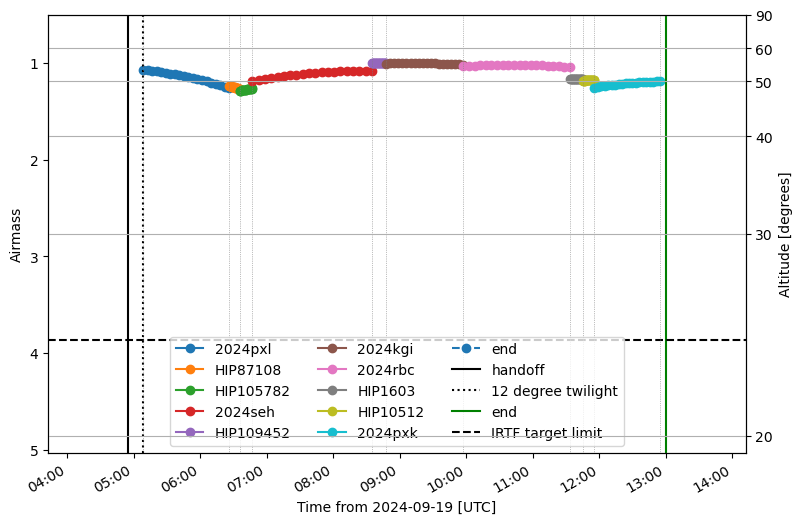

In [110]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
#last_time = pre_twil8deg.iso
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
#ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
#ax.axvline(twi18deg.plot_date, label='18deg', color='k')
#ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
    
ax.axvline(handoff.plot_date, color='k', label="handoff")
ax.axvline(pre_twil12deg.plot_date, label='12 degree twilight', color='black', ls=":")
ax.axvline(end.plot_date, label='end', color='green')

ax.axhline(1/np.cos(((90-15)*u.degree).to(u.radian)), color='k', ls='--', label='IRTF target limit')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')

#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, end.plot_date+0.05)
#ax.set_ylim(ymax=0.95)
ax.set_ylim(2.0,0.95)
ax.set_ylim(5.03, 0.5)
plt.grid()
plt.savefig('schedule_IRTF_20240918.pdf')